I'm plotting the relative magnitude of the error bars of different sources of uncertainty in the emu inference. 

In [1]:
import matplotlib
#matplotlib.use('Agg')
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
import numpy as np

In [3]:
%%bash
ls /home/users/swmclau2/Git/pearce/bin/mcmc/*scov*.npy -lt

-rw-r--r-- 1 swmclau2 kipac 8170 Nov 20 12:42 /home/users/swmclau2/Git/pearce/bin/mcmc/xigm_scov_log.npy
-rw-r--r-- 1 swmclau2 kipac 8114 Nov 15 20:39 /home/users/swmclau2/Git/pearce/bin/mcmc/xigg_scov_log.npy
-rw-r--r-- 1 swmclau2 kipac 8124 Nov 15 15:58 /home/users/swmclau2/Git/pearce/bin/mcmc/xigg_scov.npy


In [4]:
boxno, realization = 3, 1

In [5]:
shot_cov = np.loadtxt('/home/users/swmclau2/Git/pearce/bin/mcmc/xi_gg_shot_cov_true_%d%d.npy'%(boxno, realization))
jk_cov = np.loadtxt('/home/users/swmclau2/Git/pearce/bin/mcmc/xi_gg_cov_true_jk_%d%d.npy'%(boxno, realization))
sample_cov = np.loadtxt('/home/users/swmclau2/Git/pearce/bin/mcmc/xigg_scov.npy')
data_cov = np.loadtxt('xigg_ycov.npy')

In [6]:
#TODO add emu1 cov, 

Shot [  7.12955885e+02   3.65941656e+02   1.62654705e+02   9.78157102e+01
   4.49337584e+01   2.64708742e+01   1.26853650e+01   6.30783436e+00
   3.37102485e+00   1.61268834e+00   6.49612790e-01   2.08267127e-01
   6.25527917e-02   3.14930562e-02   1.47078625e-02   6.68377867e-03
   3.61430957e-03   2.27019642e-03]
JK [  1.73700809e+03   3.65513110e+02   2.19145447e+02   4.81348007e+01
   1.81491133e+01   8.08676227e+00   2.97680203e+00   1.40239502e+00
   7.44023350e-01   3.82388915e-01   1.98196033e-01   6.73654075e-02
   1.56357805e-02   8.21079326e-03   4.21104473e-03   2.06619084e-03
   1.27467276e-03   7.95496537e-04]


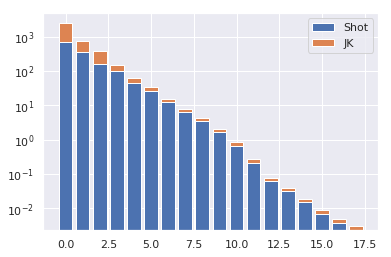

In [11]:
last_bar = np.zeros((shot_cov.shape[0],))
i = 0
for covmat, label in zip([shot_cov, jk_cov], ['Shot', 'JK']):
    #if i == 2:
    #    break
    #i+=1
    errs = np.sqrt(np.diag(covmat))
    print label, errs

    if label == 'Training':
        plt.bar(np.array(range(shot_cov.shape[0])), errs, bottom = last_bar, label = label, color = 'r')
    else:
        plt.bar(np.array(range(shot_cov.shape[0])), errs, bottom = last_bar, label = label)

    last_bar = errs
    
plt.legend(loc = 'best')
plt.yscale('log')
plt.show()